In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import joblib
import sys

#create datapaths 
tile_num = '15'
Data_path = "/u/home/m/mardren/scratch/SequenceML"
gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.minP.Rep1.tsv.gz"%Data_path
# kmer_path = "%s/6mer_prediction_tile_evenchrtesting.pkl"%Data_path
sharpr_path = "%s/6mer_sharpr_score_tile_evenchrtesting.pkl"%Data_path

In [26]:
gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
# kmer = pd.read_pickle('%s'%(kmer_path))

In [11]:
kmer

tile_num,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
region_id,,,,,,,,,,,,,,,,,,,,,
H1hesc_10_0_chr9_108475935,0.711646,0.390432,0.784411,0.909834,0.415542,0.509739,0.524503,0.431868,0.582505,0.599162,...,1.249351,0.987075,0.739397,0.718118,0.761599,0.606379,0.684942,0.387955,0.607335,0.149454
H1hesc_10_10_chr3_13672895,-0.896349,-1.152509,-1.054909,-1.052141,-0.670561,-0.700464,-0.686870,-0.740775,-0.633109,-0.500507,...,0.706768,0.791961,0.954204,0.698802,0.859263,0.825585,0.725039,0.748295,0.767101,0.904687
H1hesc_10_11_chr8_41583315,-0.208151,0.199338,0.078942,0.184955,0.066062,0.330038,-0.221709,-0.428446,-0.317078,-0.473679,...,-0.099235,-0.162221,-0.004782,-0.188087,0.143213,-0.275799,-0.593797,0.098777,0.052528,-0.142462
H1hesc_10_12_chr3_183889475,0.333803,0.525819,0.204472,0.241241,0.104714,-0.301114,0.437698,-0.203079,-0.018580,0.269372,...,-0.757841,-0.260335,-0.075799,-0.351111,-0.015874,0.265336,0.357542,0.263503,0.433529,0.495925
H1hesc_10_13_chr3_138502495,-0.078427,-0.329996,-0.310087,-0.459557,-0.530852,-0.601167,-0.642689,-0.510132,-0.439220,-0.780256,...,-0.614327,-0.740209,-0.908563,-0.861265,-0.984039,-0.809349,-0.853060,-0.862991,-0.509611,-0.546855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K562_9_96_chr6_152416495,0.666489,0.614619,0.398514,0.470889,0.575087,0.425744,0.580187,0.796507,0.672209,0.534015,...,0.739066,0.649431,0.685671,0.898300,0.920283,0.612503,0.160731,0.539281,0.625805,1.150177
K562_9_97_chr3_170719195,-0.543994,-0.509603,-0.423330,-0.528373,-0.221781,-0.251013,-0.353299,-0.595985,-0.378795,-0.232148,...,0.042366,0.131073,0.095501,-0.003457,0.121375,0.293908,0.302898,0.323821,0.092970,0.087692
K562_9_98_chr1_196018775,-0.185112,-0.199817,-0.276288,0.050579,-0.091215,-0.052089,-0.131751,-0.135250,0.094406,0.016778,...,-0.045564,0.044971,-0.129946,-0.136330,-0.269367,-0.454809,-0.032174,-0.169967,-0.194202,-0.317181


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import joblib
import sys

#create datapaths 
tile_num = '14'
Data_path = "/u/home/m/mardren/scratch/SequenceML"
gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
#kmer_path = "%s/6mer_prediction_tile_evenchrtesting.pkl"%Data_path
sharpr_path = "%s/6mer_sharpr_score_tile_evenchrtesting.pkl"%Data_path


#open data from csv into dataframes
gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
#     kmer = pd.read_pickle('%s'%(kmer_path))
#subset by selected tile
sharpr = pd.read_pickle('%s'%(sharpr_path))
gkm_15 = gkm[['feat_gksvm_%s'%tile_num]]
gkm = gkm_15.rename(columns = {'feat_gksvm_%s'%tile_num:'gkm'})
conv_15 = conv[[tile_num]]
conv_15 = conv_15.rename(columns = {tile_num:'conv'})
deepfact_15 = deepfact[[tile_num]]
deepfact_15 = deepfact_15.rename(columns = {tile_num:'deepfact'})
tile_num = int(tile_num)
#     kmer_15 = kmer[[tile_num]]
#     kmer_15 = kmer_15.rename(columns = {tile_num:'kmer_%s'%tile_num})
sharpr_15 = sharpr[[tile_num]]
label = sharpr_15.rename(columns = {tile_num:'label'})

#create data dataframe
#data = pd.concat([conv_15, gkm_15, deepfact_15, kmer_15, sharpr_15], axis=1)
data = pd.concat([conv_15, gkm_15, deepfact_15, label], axis=1)
#check correlation
sharpr_15_array = np.asarray(sharpr_15)
sharpr_15_array = sharpr_15_array.flatten()
conv_15_array = np.asarray(conv_15)
conv_15_array = conv_15_array.flatten()
deepfact_15_array = np.asarray(deepfact_15)
deepfact_15_array = deepfact_15_array.flatten()
#     kmer_15_array = np.asarray(kmer_15)
#     kmer_15_array = kmer_15_array.flatten()
gkm_15_array = np.asarray(gkm_15)
gkm_15_array = gkm_15_array.flatten()
print('corr of Normalized (RNA/DNA) and dragoNN ConvModel:')
print(pd.Series(sharpr_15_array).corr(pd.Series(conv_15_array)))
print('corr of Normalized (RNA/DNA) and gkmSVMModel:')
print(pd.Series(sharpr_15_array).corr(pd.Series(gkm_15_array)))
print('corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:')
print(pd.Series(sharpr_15_array).corr(pd.Series(deepfact_15_array)))
#     print('corr of Normalized (RNA/DNA) and 6merModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(kmer_15_array)))


#reset index to be able to access region_id
data = data.reset_index()

#split region_id to create chrom column
data['chrom'] = data['region_id'].str.split('_').str[3]

#splitting training testing data
# train_chroms = [f'chr{i}' for i in range(1,23,2)]
# test_chroms = [f'chr{i}' for i in range(2,23,2)]
# chrX = data[data["chrom"]==('chrX')]
# test_set = data[data["chrom"].isin(test_chroms)]
# train_set = data[data["chrom"].isin(train_chroms)]
# train_set = train_set.append(chrX)
test_set_8 = data[data["chrom"] == ('chr8')]
test_set_18 = data[data["chrom"] ==('chr18')]
test_set = pd.concat([test_set_8,test_set_18],axis=0)
train_set = data[data["chrom"] != ('chr8')]
train_set = train_set[train_set["chrom"] != ('chr18')]


test_set = test_set.drop(columns=['chrom'])
train_set = train_set.drop(columns=['chrom'])
data = data.drop(columns=['chrom'])

test_regionid = test_set['region_id']
test_regionid = pd.DataFrame(test_regionid)
test_regionid = test_regionid.reset_index(drop=True)
test_regionid = test_regionid.sort_values(by=['region_id'])


corr of Normalized (RNA/DNA) and dragoNN ConvModel:
0.30884640573697925
corr of Normalized (RNA/DNA) and gkmSVMModel:
0.15331670236282258
corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:
0.3723966193784438


In [35]:
test_set = test_set.set_index('region_id',drop=True)

In [24]:
conv = conv.reset_index()
#split region_id to create chrom column
conv['chrom'] = conv['region_id'].str.split('_').str[3]
test_chroms = [f'chr{i}' for i in range(2,23,2)]
test_set = conv[conv["chrom"].isin(test_chroms)]
test_set = test_set.drop(columns=['chrom'])
test_set = test_set.set_index('region_id',drop=True)

In [46]:
test_set.to_csv('/u/home/m/mardren/scratch/SHARPR/deepfact_even.tsv',sep='\t',header=False)

In [36]:
df = test_set

In [20]:
predictions = pd.read_csv('/u/home/m/mardren/scratch/SHARPR/sequence_predictions_chr8_18.tsv',sep='\t',header=None,index_col=0)

In [42]:
predictions = predictions_df

In [43]:
predictions = predictions.reset_index()
predictions = predictions.rename(columns={0:'region_id'})
# predictions = predictions.set_index('region_id',drop=True)
predictions_15 = predictions[['region_id',15]]
predictions_15 = predictions_15.set_index('region_id',drop=True)
predictions_15 = predictions_15.rename(columns={15:'prediction'})
df = pd.concat([predictions_15,test_set],axis=1)

In [44]:
corr = df.corr()

In [45]:
corr = corr.round(decimals=2)

In [46]:
feature_corr_array = np.asarray(corr)

In [47]:
features = ["prediction","conv","gkm","deepfact","label"]

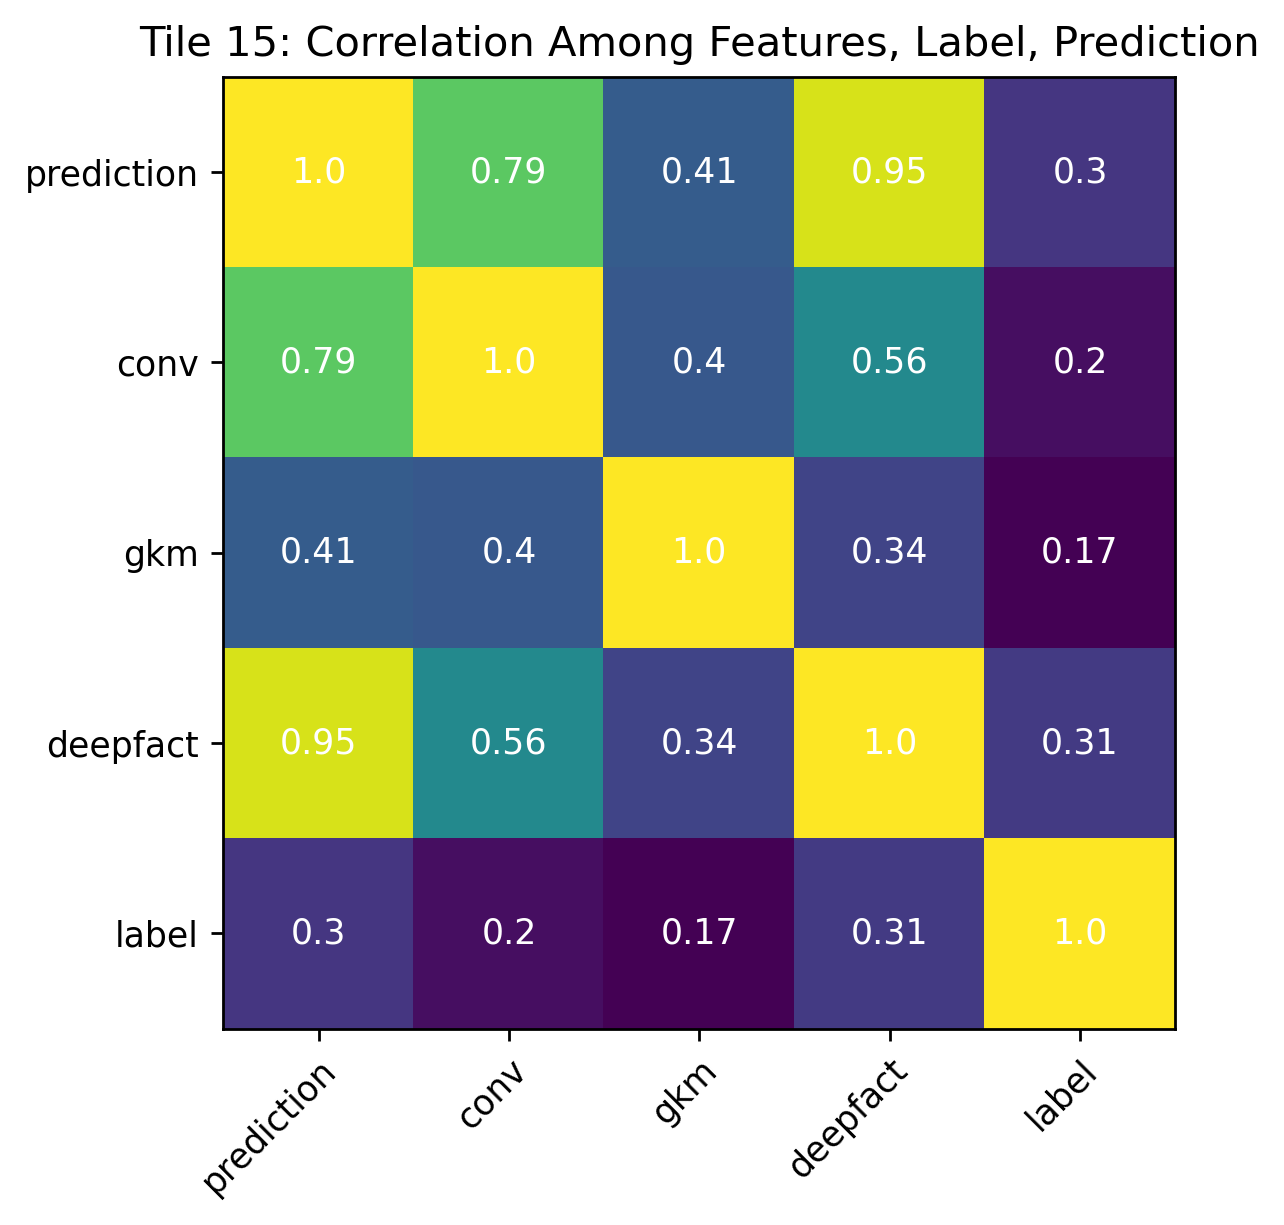

In [48]:
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
im = ax.imshow(feature_corr_array)

# We want to show all ticks...
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
# ... and label them with the respective list entries
ax.set_xticklabels(features)
ax.set_yticklabels(features)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(features)):
    for j in range(len(features)):
        text = ax.text(j, i, feature_corr_array[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Tile 15: Correlation Among Features, Label, Prediction")
fig.tight_layout()
plt.show()

KeyError: (1, 1)

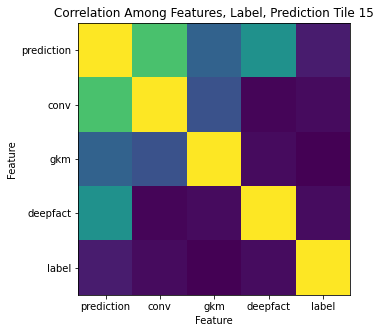

In [28]:
#generate heatmap
start = 0
matrix = feature_corr[start:start+5:1]
plt.figure(figsize = (5,5))
plt.imshow(matrix)
plt.title("Correlation Among Features, Label, Prediction Tile 15")
plt.xlabel("Feature")
plt.xticks(np.arange(5),matrix.columns)
plt.ylabel("Feature")
plt.yticks(np.arange(5),matrix.index)
for i in range(len(feature_corr)):
     for j in range(len(feature_corr)):
        text = plt.text(j+1, i+1, feature_corr[i+1, j+1],
                       ha="center", va="center", color="w")
plt.imshow(matrix,cmap='plasma')

In [10]:
test_regionid = test_regionid.sort_values(by=['region_id'])

    


In [16]:
test_set= test_set.sort_values(by=['region_id'])

In [17]:
    labels = train_set['sharpr_%s'%tile_num].values
    train_set = train_set.drop(columns=['region_id','sharpr_%s'%tile_num])
    encodings = train_set.values.tolist()
    encodings = np.asarray(encodings)
    encodings_df = pd.DataFrame(encodings)
    encodings_df.fillna(encodings_df.mean(), inplace=True)
    encodings = encodings_df.to_numpy()
    labels = np.reshape(labels,(14753 ,))

    #format the testing data
    test_labels = test_set['sharpr_%s'%tile_num].values
    test_set = test_set.drop(columns=['region_id','sharpr_%s'%tile_num])
    test_encodings = test_set.values.tolist()
    test_encodings = np.asarray(test_encodings)
    test_encodings_df = pd.DataFrame(test_encodings)
    test_encodings_df.fillna(test_encodings_df.mean(), inplace=True)
    test_encodings = test_encodings_df.to_numpy()
    test_labels = np.reshape(test_labels,(967 ,))


    #format data
    data_labels = data['sharpr_%s'%tile_num].values
    data = data.drop(columns=['region_id','sharpr_%s'%tile_num])
    data_encodings = data.values.tolist()
    data_encodings = np.asarray(data_encodings)
    data_encodings_df = pd.DataFrame(data_encodings)
    data_encodings_df.fillna(data_encodings_df.mean(), inplace=True)
    data_encodings = data_encodings_df.to_numpy()
    data_labels = np.reshape(data_labels,(15720,))

    #train a linear regressor on the training dataset. 
    from sklearn.linear_model import LinearRegression

    sequence_regressor = LinearRegression()
    sequence_regressor.fit(encodings, labels)

    #compute mse
    from sklearn.metrics import mean_squared_error
    train_predictions = sequence_regressor.predict(encodings)
    train_mse = mean_squared_error(train_predictions, labels)
    train_rmse = np.sqrt(train_mse)
    print("root mean squared error = %s"%train_rmse)

    test_predictions = sequence_regressor.predict(test_encodings)
    test_mse = mean_squared_error(test_predictions, test_labels)
    test_rmse = np.sqrt(test_mse)
    
    predictions = sequence_regressor.predict(test_encodings)
#     mse = mean_squared_error(predictions, data_labels)
#     rmse = np.sqrt(mse)

    data_encodings=data_encodings.flatten()
    data_labels=data_labels.flatten()
    #visualize the results
    corr = pd.Series(test_predictions).corr(pd.Series(test_labels))

    caption = "correlation pearson r= %s"%(corr)
    rmse = "root mean squared error = %s"%test_rmse




#     plt.scatter(
#         x=test_predictions,
#         y=test_labels,
#         edgecolors='w'
#     )
#     tile_num = int(tile_num)
#     tile_num = tile_num + 1

#     plt.title("Tile %s Sequence Regressor on chr8,chr18 Test Set"%(tile_num))
#     plt.xlabel("test_predictions \n\n %s \n\n %s"%(caption,rmse))
#     plt.ylabel("test_labels")

#     plt.savefig("sequence_predictions_tile%s"%tile_num)

#     print("Regressor coefficients(ConvModel,gkmSVMModel,DeepFactorizedModel):")
#     print(sequence_regressor.coef_)

#     test_predictions = pd.DataFrame(test_predictions)
#     test_predictions = pd.concat([test_predictions,test_regionid], axis=1)
#     test_predictions = test_predictions.set_index('region_id')
    test_labels = pd.DataFrame(test_labels)
    test_labels = pd.concat([test_labels,test_regionid], axis=1)
    test_labels = test_labels.set_index('region_id')

root mean squared error = 1.438863763193296


In [18]:
test_labels

,0
region_id,
H1hesc_10_11_chr8_41583315,0.126722
H1hesc_10_3_chr8_142524515,-0.666827
H1hesc_12_102_chr8_123689875,-0.141366
H1hesc_12_107_chr8_23331975,-1.337668
H1hesc_12_108_chr8_27445875,-1.091451
...,...
K562_9_395_chr18_48395095,-1.804331
K562_9_66_chr18_68095895,-3.022971
K562_9_67_chr18_2222715,0.514238


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import joblib
import sys


#create datapaths 
tile_num = '15'
Data_path = "/u/home/m/mardren/scratch/SequenceML"
gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.minP.Rep1.tsv.gz"%Data_path
kmer_path = "%s/6mer_prediction_tile_evenchrtesting.pkl"%Data_path
sharpr_path = "%s/6mer_sharpr_score_tile_evenchrtesting.pkl"%Data_path


#open data from csv into dataframes
gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
kmer = pd.read_pickle('%s'%(kmer_path))
#subset by selected tile
sharpr = pd.read_pickle('%s'%(sharpr_path))
gkm_15 = gkm[['feat_gksvm_%s'%tile_num]]
gkm_15 = gkm_15.rename(columns = {'feat_gksvm_%s'%tile_num:'gkm_%s'%tile_num})
conv_15 = conv[[tile_num]]
conv_15 = conv_15.rename(columns = {tile_num:'conv_%s'%tile_num})
deepfact_15 = deepfact[[tile_num]]
deepfact_15 = deepfact_15.rename(columns = {tile_num:'deepfact_%s'%tile_num})
tile_num = int(tile_num)
kmer_15 = kmer[[tile_num]]
kmer_15 = kmer_15.rename(columns = {tile_num:'kmer_%s'%tile_num})
sharpr_15 = sharpr[[tile_num]]
sharpr_15 = sharpr_15.rename(columns = {tile_num:'sharpr_%s'%tile_num})

#create data dataframe
#data = pd.concat([conv_15, gkm_15, deepfact_15, kmer_15, sharpr_15], axis=1)
data = pd.concat([conv_15, gkm_15, deepfact_15, sharpr_15], axis=1)
#check correlation
#     sharpr_15_array = np.asarray(sharpr_15)
#     sharpr_15_array = sharpr_15_array.flatten()
#     conv_15_array = np.asarray(conv_15)
#     conv_15_array = conv_15_array.flatten()
#     deepfact_15_array = np.asarray(deepfact_15)
#     deepfact_15_array = deepfact_15_array.flatten()
#     kmer_15_array = np.asarray(kmer_15)
#     kmer_15_array = kmer_15_array.flatten()
#     gkm_15_array = np.asarray(gkm_15)
#     gkm_15_array = gkm_15_array.flatten()
#     print('corr of Normalized (RNA/DNA) and dragoNN ConvModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(conv_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and gkmSVMModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(gkm_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(deepfact_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and 6merModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(kmer_15_array),method='spearman'))


#reset index to be able to access region_id
data = data.reset_index()

#split region_id to create chrom column
data['chrom'] = data['region_id'].str.split('_').str[3]

#splitting training testing data
train_chroms = [f'chr{i}' for i in range(1,23,2)]
test_chroms = [f'chr{i}' for i in range(2,23,2)]
chrX = data[data["chrom"]==('chrX')]
test_set = data[data["chrom"].isin(test_chroms)]
train_set = data[data["chrom"].isin(train_chroms)]
train_set = train_set.append(chrX)

test_set = test_set.drop(columns=['chrom'])
train_set = train_set.drop(columns=['chrom'])
data = data.drop(columns=['chrom'])

In [28]:
train_set

,region_id,conv_15,gkm_15,deepfact_15,sharpr_15
0,H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-0.091613
1,H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-0.762057
3,H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,0.427690
4,H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-3.432362
5,H1hesc_10_14_chr19_4058575,0.153939,0.206985,0.391160,-3.152254
...,...,...,...,...,...
15601,K562_9_353_chrX_44133575,-0.311476,0.083182,0.214174,-0.344899
15628,K562_9_378_chrX_3800715,-0.190188,0.174803,0.134065,-0.192896
15664,K562_9_4_chrX_135149235,-0.075759,0.101172,-0.261884,-0.264931
15708,K562_9_8_chrX_7163775,-0.141401,0.092581,-0.107801,2.355541


In [8]:
test_regionid = test_set['region_id']

In [9]:
test_regionid = test_regionid.reset_index(drop=True)

In [10]:
sharpr = sharpr.reset_index()
sharpr['chrom'] = sharpr['region_id'].str.split('_').str[3]

In [11]:
test_set_8 = sharpr[sharpr["chrom"] == ('chr8')]
test_set_18 = sharpr[sharpr["chrom"] ==('chr18')]
sharpr_test_set = pd.concat([test_set_8,test_set_18],axis=0)


In [12]:
sharpr_test_set = sharpr_test_set.drop(columns=['chrom'])
sharpr_test_set = sharpr_test_set.set_index('region_id',drop=True)

In [14]:
sharpr_test_set 

tile_num,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
region_id,,,,,,,,,,,,,,,,,,,,,
H1hesc_10_11_chr8_41583315,0.317231,-0.724604,-0.405134,-1.868461,-0.351502,-0.638258,-0.056330,-1.467518,0.617258,-0.688854,...,-1.002011,-1.014751,-0.028310,0.024857,-3.592827,0.093222,-0.344899,-3.836752,-1.729563,-1.188174
H1hesc_10_16_chr18_77659435,0.928119,0.747613,-0.972930,-1.489949,0.130680,-1.152254,0.121977,-2.889220,-2.804331,0.655101,...,-3.514824,-0.496902,-0.081865,0.751316,-2.592827,3.928119,0.559523,-2.344899,-0.707469,-1.929862
H1hesc_10_2_chr18_13377695,1.093222,1.503098,-3.592827,-0.640355,-1.219368,-0.567292,3.825026,-1.362387,0.432708,-0.905614,...,-0.199358,-0.081865,-0.428557,0.061025,-0.480783,-1.070724,0.937501,0.245988,-0.635576,1.511510
H1hesc_10_3_chr8_142524515,-0.564344,-0.640884,-0.226255,0.413440,-0.446437,0.211866,0.352136,-1.290451,-0.723411,-2.089060,...,-0.066797,-0.126259,0.447296,-0.969032,-0.690035,-1.450509,-0.991591,-0.929862,-0.174974,-0.990891
H1hesc_12_102_chr8_123689875,0.881872,-4.554353,-0.077203,0.531718,0.153703,3.409988,0.371308,-0.190728,1.113589,0.085535,...,0.049121,-0.479200,-0.525471,-0.585907,0.644608,0.247443,-4.666827,-1.514824,0.088997,0.655101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K562_9_66_chr18_68095895,-0.344899,-1.804331,0.655101,-0.344899,2.044143,-0.110434,-1.344899,0.655101,1.770578,2.977029,...,-1.789684,-0.344899,-1.514824,-0.344899,-3.592827,0.655101,0.655101,-3.804331,-0.344899,-0.698536
K562_9_67_chr18_2222715,0.339599,-2.567292,-1.192896,-2.836752,1.355541,0.655101,-3.929862,0.655101,-0.576846,-3.134976,...,0.314872,0.980501,0.422124,-0.929862,0.752398,0.076741,0.825026,-2.152254,1.655101,1.877493
K562_9_81_chr18_32905495,-4.592827,-0.996976,0.572639,1.503098,-2.929862,-2.514824,-0.929862,-2.666827,-2.666827,3.146954,...,0.655101,-0.081865,-1.666827,3.561991,-1.666827,-3.152254,1.655101,-3.666827,0.292531,-1.666827


corr of Normalized (RNA/DNA) and dragoNN ConvModel:
0.30884640573697925
corr of Normalized (RNA/DNA) and gkmSVMModel:
0.15331670236282258
corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:
0.3723966193784438
root mean squared error = 1.4235410021036747
Regressor coefficients(ConvModel,gkmSVMModel,DeepFactorizedModel):
[1.0625211  0.0114273  1.21757387]


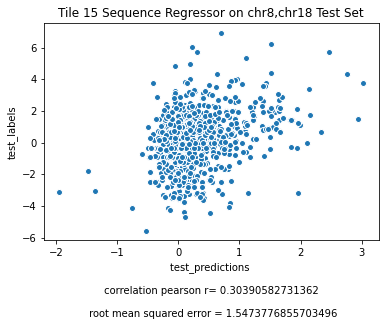

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import joblib
import sys

#chr8,chr18 as test set
def sequence_file(tile_num):
    #create datapaths 
    Data_path = "/u/home/m/mardren/scratch/SequenceML"
    gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
    conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
    deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
    #kmer_path = "%s/6mer_prediction_tile_evenchrtesting.pkl"%Data_path
    sharpr_path = "%s/6mer_sharpr_score_tile_evenchrtesting.pkl"%Data_path


    #open data from csv into dataframes
    gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
    conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
    deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
    #     kmer = pd.read_pickle('%s'%(kmer_path))
    #subset by selected tile
    sharpr = pd.read_pickle('%s'%(sharpr_path))
    gkm_15 = gkm[['feat_gksvm_%s'%tile_num]]
    gkm_15 = gkm_15.rename(columns = {'feat_gksvm_%s'%tile_num:'gkm_%s'%tile_num})
    conv_15 = conv[[tile_num]]
    conv_15 = conv_15.rename(columns = {tile_num:'conv_%s'%tile_num})
    deepfact_15 = deepfact[[tile_num]]
    deepfact_15 = deepfact_15.rename(columns = {tile_num:'deepfact_%s'%tile_num})
    tile_num = int(tile_num)
    #     kmer_15 = kmer[[tile_num]]
    #     kmer_15 = kmer_15.rename(columns = {tile_num:'kmer_%s'%tile_num})
    sharpr_15 = sharpr[[tile_num]]
    sharpr_15 = sharpr_15.rename(columns = {tile_num:'sharpr_%s'%tile_num})

    #create data dataframe
    #data = pd.concat([conv_15, gkm_15, deepfact_15, kmer_15, sharpr_15], axis=1)
    data = pd.concat([conv_15, gkm_15, deepfact_15, sharpr_15], axis=1)
#     data = pd.concat([conv_15,deepfact_15, sharpr_15], axis=1)
    #check correlation
    sharpr_15_array = np.asarray(sharpr_15)
    sharpr_15_array = sharpr_15_array.flatten()
    conv_15_array = np.asarray(conv_15)
    conv_15_array = conv_15_array.flatten()
    deepfact_15_array = np.asarray(deepfact_15)
    deepfact_15_array = deepfact_15_array.flatten()
    #     kmer_15_array = np.asarray(kmer_15)
    #     kmer_15_array = kmer_15_array.flatten()
    gkm_15_array = np.asarray(gkm_15)
    gkm_15_array = gkm_15_array.flatten()
    print('corr of Normalized (RNA/DNA) and dragoNN ConvModel:')
    print(pd.Series(sharpr_15_array).corr(pd.Series(conv_15_array)))
    print('corr of Normalized (RNA/DNA) and gkmSVMModel:')
    print(pd.Series(sharpr_15_array).corr(pd.Series(gkm_15_array)))
    print('corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:')
    print(pd.Series(sharpr_15_array).corr(pd.Series(deepfact_15_array)))
    #     print('corr of Normalized (RNA/DNA) and 6merModel:')
    #     print(pd.Series(sharpr_15_array).corr(pd.Series(kmer_15_array)))


    #reset index to be able to access region_id
    data = data.reset_index()

    #split region_id to create chrom column
    data['chrom'] = data['region_id'].str.split('_').str[3]

    #splitting training testing data
    #     train_chroms = [f'chr{i}' for i in range(1,23,2)]
    #     test_chroms = [f'chr{i}' for i in range(2,23,2)]
    #     chrX = data[data["chrom"]==('chrX')]
    #     test_set = data[data["chrom"].isin(test_chroms)]
    #     train_set = data[data["chrom"].isin(train_chroms)]
    #     train_set = train_set.append(chrX)
    test_set_8 = data[data["chrom"] == ('chr8')]
    test_set_18 = data[data["chrom"] ==('chr18')]
    test_set = pd.concat([test_set_8,test_set_18],axis=0)
    train_set = data[data["chrom"] != ('chr8')]
    train_set = train_set[train_set["chrom"] != ('chr18')]


    test_set = test_set.drop(columns=['chrom'])
    train_set = train_set.drop(columns=['chrom'])
    data = data.drop(columns=['chrom'])

    test_regionid = test_set['region_id']
    test_regionid = pd.DataFrame(test_regionid)
    test_regionid = test_regionid.reset_index(drop=True)
    test_regionid = test_regionid.sort_values(by=['region_id'])

    
#     sharpr_15_array = np.asarray(test_set['sharpr_15'])
#     sharpr_15_array = sharpr_15_array.flatten()
#     conv_15_array = np.asarray(conv_15)
#     conv_15_array = conv_15_array.flatten()
#     deepfact_15_array = np.asarray(deepfact_15)
#     deepfact_15_array = deepfact_15_array.flatten()
#     kmer_15_array = np.asarray(kmer_15)
#     kmer_15_array = kmer_15_array.flatten()
#     gkm_15_array = np.asarray(gkm_15)
#     gkm_15_array = gkm_15_array.flatten()
#     print('corr of Normalized (RNA/DNA) and dragoNN ConvModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(conv_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and gkmSVMModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(gkm_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(deepfact_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and 6merModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(kmer_15_array),method='spearman'))
    
    #format training data
    labels = train_set['sharpr_%s'%tile_num].values
    train_set = train_set.drop(columns=['region_id','sharpr_%s'%tile_num])
    encodings = train_set.values.tolist()
    encodings = np.asarray(encodings)
    encodings_df = pd.DataFrame(encodings)
    encodings_df.fillna(encodings_df.mean(), inplace=True)
    encodings = encodings_df.to_numpy()
    labels = np.reshape(labels,(14753 ,))

    #format the testing data
    test_labels = test_set['sharpr_%s'%tile_num].values
    test_set = test_set.drop(columns=['region_id','sharpr_%s'%tile_num])
    test_encodings = test_set.values.tolist()
    test_encodings = np.asarray(test_encodings)
    test_encodings_df = pd.DataFrame(test_encodings)
    test_encodings_df.fillna(test_encodings_df.mean(), inplace=True)
    test_encodings = test_encodings_df.to_numpy()
    test_labels = np.reshape(test_labels,(967 ,))


    #format data
    data_labels = data['sharpr_%s'%tile_num].values
    data = data.drop(columns=['region_id','sharpr_%s'%tile_num])
    data_encodings = data.values.tolist()
    data_encodings = np.asarray(data_encodings)
    data_encodings_df = pd.DataFrame(data_encodings)
    data_encodings_df.fillna(data_encodings_df.mean(), inplace=True)
    data_encodings = data_encodings_df.to_numpy()
    data_labels = np.reshape(data_labels,(15720,))

    #train a linear regressor on the training dataset. 
    from sklearn.linear_model import LinearRegression

    sequence_regressor = LinearRegression()
    sequence_regressor.fit(encodings, labels)

    #compute mse
    from sklearn.metrics import mean_squared_error
    train_predictions = sequence_regressor.predict(encodings)
    train_mse = mean_squared_error(train_predictions, labels)
    train_rmse = np.sqrt(train_mse)
    print("root mean squared error = %s"%train_rmse)

    test_predictions = sequence_regressor.predict(test_encodings)
    test_mse = mean_squared_error(test_predictions, test_labels)
    test_rmse = np.sqrt(test_mse)
    

#     mse = mean_squared_error(predictions, data_labels)
#     rmse = np.sqrt(mse)

#     data_encodings=data_encodings.flatten()
#     data_labels=data_labels.flatten()
    #visualize the results
    corr = pd.Series(test_predictions).corr(pd.Series(test_labels))

    caption = "correlation pearson r= %s"%(corr)
    rmse = "root mean squared error = %s"%test_rmse




    plt.scatter(
        x=test_predictions,
        y=test_labels,
        edgecolors='w'
    )
    tile_num = int(tile_num)
    tile_num = tile_num + 1

    plt.title("Tile %s Sequence Regressor on chr8,chr18 Test Set"%(tile_num))
    plt.xlabel("test_predictions \n\n %s \n\n %s"%(caption,rmse))
    plt.ylabel("test_labels")

    plt.savefig("sequence_predictions_tile%s"%tile_num)

    print("Regressor coefficients(ConvModel,gkmSVMModel,DeepFactorizedModel):")
    print(sequence_regressor.coef_)

    test_predictions = pd.DataFrame(test_predictions)
    test_predictions = pd.concat([test_predictions,test_regionid], axis=1)
    test_predictions = test_predictions.set_index('region_id')
    test_labels = pd.DataFrame(test_labels)
    test_labels = pd.concat([test_labels,test_regionid], axis=1)
    test_labels = test_labels.set_index('region_id')
#     return test_labels
#     return corr




if __name__ == "__main__":
    # take tile_num in as a parameter
    sequence_file('14')
#     corr = []
#     for tile in range(31):
#         tile_num = str(tile)
#         tile_corr = sequence_file(tile_num)
#         corr.append(tile_corr)

#     corr = []

#     label_df = pd.DataFrame()
#     for tile in range(31):
#         tile_num = str(tile)
#         tile_df = sequence_file(tile_num)
#         tile_num = int(tile_num)
#         real_tile_num = tile_num+1
#         tile_df = tile_df.rename(columns={0:real_tile_num})
#         label_df = pd.concat([label_df,tile_df], axis=1)
        
    
    
#     tiles = list(range(1, 31))
#      plt.plot(
#         tiles,
#         corr
#     )

#     plt.title("Correlation by Tile")
#     plt.xlabel("tile")
#     plt.ylabel("correlation")

#     plt.show("sequence_predictions_tile")

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import joblib
import sys

#even chr as test set
def sequence_file(tile_num):
    #create datapaths 
    Data_path = "/u/home/m/mardren/scratch/SequenceML"
    gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
    conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
    deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.minP.Rep1.tsv.gz"%Data_path
    #kmer_path = "%s/6mer_prediction_tile_evenchrtesting.pkl"%Data_path
    sharpr_path = "%s/6mer_sharpr_score_tile_evenchrtesting.pkl"%Data_path


    #open data from csv into dataframes
    gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
    conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
    deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
    #     kmer = pd.read_pickle('%s'%(kmer_path))
    #subset by selected tile
    sharpr = pd.read_pickle('%s'%(sharpr_path))
    gkm_15 = gkm[['feat_gksvm_%s'%tile_num]]
    gkm_15 = gkm_15.rename(columns = {'feat_gksvm_%s'%tile_num:'gkm_%s'%tile_num})
    conv_15 = conv[[tile_num]]
    conv_15 = conv_15.rename(columns = {tile_num:'conv_%s'%tile_num})
    deepfact_15 = deepfact[[tile_num]]
    deepfact_15 = deepfact_15.rename(columns = {tile_num:'deepfact_%s'%tile_num})
    tile_num = int(tile_num)
    #     kmer_15 = kmer[[tile_num]]
    #     kmer_15 = kmer_15.rename(columns = {tile_num:'kmer_%s'%tile_num})
    sharpr_15 = sharpr[[tile_num]]
    sharpr_15 = sharpr_15.rename(columns = {tile_num:'sharpr_%s'%tile_num})

    #create data dataframe
    #data = pd.concat([conv_15, gkm_15, deepfact_15, kmer_15, sharpr_15], axis=1)
#     data = pd.concat([conv_15, gkm_15, deepfact_15, sharpr_15], axis=1)
    data = pd.concat([conv_15,deepfact_15, sharpr_15], axis=1)
    #check correlation
    sharpr_15_array = np.asarray(sharpr_15)
    sharpr_15_array = sharpr_15_array.flatten()
    conv_15_array = np.asarray(conv_15)
    conv_15_array = conv_15_array.flatten()
    deepfact_15_array = np.asarray(deepfact_15)
    deepfact_15_array = deepfact_15_array.flatten()
    #     kmer_15_array = np.asarray(kmer_15)
    #     kmer_15_array = kmer_15_array.flatten()
    gkm_15_array = np.asarray(gkm_15)
    gkm_15_array = gkm_15_array.flatten()
    print('corr of Normalized (RNA/DNA) and dragoNN ConvModel:')
    print(pd.Series(sharpr_15_array).corr(pd.Series(conv_15_array)))
    print('corr of Normalized (RNA/DNA) and gkmSVMModel:')
    print(pd.Series(sharpr_15_array).corr(pd.Series(gkm_15_array)))
    print('corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:')
    print(pd.Series(sharpr_15_array).corr(pd.Series(deepfact_15_array)))
    #     print('corr of Normalized (RNA/DNA) and 6merModel:')
    #     print(pd.Series(sharpr_15_array).corr(pd.Series(kmer_15_array)))


    #reset index to be able to access region_id
    data = data.reset_index()

    #split region_id to create chrom column
    data['chrom'] = data['region_id'].str.split('_').str[3]

    #splitting training testing data
    train_chroms = [f'chr{i}' for i in range(1,23,2)]
    test_chroms = [f'chr{i}' for i in range(2,23,2)]
    chrX = data[data["chrom"]==('chrX')]
    test_set = data[data["chrom"].isin(test_chroms)]
    train_set = data[data["chrom"].isin(train_chroms)]
    train_set = train_set.append(chrX)
#     test_set_8 = data[data["chrom"] == ('chr8')]
#     test_set_18 = data[data["chrom"] ==('chr18')]
#     test_set = pd.concat([test_set_8,test_set_18],axis=0)
#     train_set = data[data["chrom"] != ('chr8')]
#     train_set = train_set[train_set["chrom"] != ('chr18')]


    test_set = test_set.drop(columns=['chrom'])
    train_set = train_set.drop(columns=['chrom'])
    data = data.drop(columns=['chrom'])

    test_regionid = test_set['region_id']
    test_regionid = pd.DataFrame(test_regionid)
    test_regionid = test_regionid.reset_index(drop=True)
    test_regionid = test_regionid.sort_values(by=['region_id'])

    
#     sharpr_15_array = np.asarray(test_set['sharpr_15'])
#     sharpr_15_array = sharpr_15_array.flatten()
#     conv_15_array = np.asarray(conv_15)
#     conv_15_array = conv_15_array.flatten()
#     deepfact_15_array = np.asarray(deepfact_15)
#     deepfact_15_array = deepfact_15_array.flatten()
#     kmer_15_array = np.asarray(kmer_15)
#     kmer_15_array = kmer_15_array.flatten()
#     gkm_15_array = np.asarray(gkm_15)
#     gkm_15_array = gkm_15_array.flatten()
#     print('corr of Normalized (RNA/DNA) and dragoNN ConvModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(conv_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and gkmSVMModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(gkm_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(deepfact_15_array),method='spearman'))
#     print('corr of Normalized (RNA/DNA) and 6merModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(kmer_15_array),method='spearman'))
    
    #format training data
    labels = train_set['sharpr_%s'%tile_num].values
    train_set = train_set.drop(columns=['region_id','sharpr_%s'%tile_num])
    encodings = train_set.values.tolist()
    encodings = np.asarray(encodings)
    encodings_df = pd.DataFrame(encodings)
    encodings_df.fillna(encodings_df.mean(), inplace=True)
    encodings = encodings_df.to_numpy()
    labels = np.reshape(labels,(8343 ,))

    #format the testing data
    test_labels = test_set['sharpr_%s'%tile_num].values
    test_set = test_set.drop(columns=['region_id','sharpr_%s'%tile_num])
    test_encodings = test_set.values.tolist()
    test_encodings = np.asarray(test_encodings)
    test_encodings_df = pd.DataFrame(test_encodings)
    test_encodings_df.fillna(test_encodings_df.mean(), inplace=True)
    test_encodings = test_encodings_df.to_numpy()
    test_labels = np.reshape(test_labels,(7377 ,))


    #format data
    data_labels = data['sharpr_%s'%tile_num].values
    data = data.drop(columns=['region_id','sharpr_%s'%tile_num])
    data_encodings = data.values.tolist()
    data_encodings = np.asarray(data_encodings)
    data_encodings_df = pd.DataFrame(data_encodings)
    data_encodings_df.fillna(data_encodings_df.mean(), inplace=True)
    data_encodings = data_encodings_df.to_numpy()
    data_labels = np.reshape(data_labels,(15720,))

    #train a linear regressor on the training dataset. 
    from sklearn.linear_model import LinearRegression

    sequence_regressor = LinearRegression()
    sequence_regressor.fit(encodings, labels)

    #compute mse
    from sklearn.metrics import mean_squared_error
    train_predictions = sequence_regressor.predict(encodings)
    train_mse = mean_squared_error(train_predictions, labels)
    train_rmse = np.sqrt(train_mse)
    print("root mean squared error = %s"%train_rmse)

    test_predictions = sequence_regressor.predict(test_encodings)
    test_mse = mean_squared_error(test_predictions, test_labels)
    test_rmse = np.sqrt(test_mse)
    

#     mse = mean_squared_error(predictions, data_labels)
#     rmse = np.sqrt(mse)

#     data_encodings=data_encodings.flatten()
#     data_labels=data_labels.flatten()
    #visualize the results
    corr = pd.Series(test_predictions).corr(pd.Series(test_labels))

    caption = "correlation pearson r= %s"%(corr)
    rmse = "root mean squared error = %s"%test_rmse




#     plt.scatter(
#         x=test_predictions,
#         y=test_labels,
#         edgecolors='w'
#     )
#     tile_num = int(tile_num)
#     tile_num = tile_num + 1

#     plt.title("Tile %s Sequence Regressor on chr8,chr18 Test Set"%(tile_num))
#     plt.xlabel("test_predictions \n\n %s \n\n %s"%(caption,rmse))
#     plt.ylabel("test_labels")

#     plt.savefig("sequence_predictions_tile%s"%tile_num)

#     print("Regressor coefficients(ConvModel,gkmSVMModel,DeepFactorizedModel):")
#     print(sequence_regressor.coef_)

    test_predictions = pd.DataFrame(test_predictions)
    test_predictions = pd.concat([test_predictions,test_regionid], axis=1)
    test_predictions = test_predictions.set_index('region_id')
    test_labels = pd.DataFrame(test_labels)
    test_labels = pd.concat([test_labels,test_regionid], axis=1)
    test_labels = test_labels.set_index('region_id')
    return test_predictions
#     return corr




if __name__ == "__main__":
    # take tile_num in as a parameter
#     sequence_file('14')
#     corr = []
#     for tile in range(31):
#         tile_num = str(tile)
#         tile_corr = sequence_file(tile_num)
#         corr.append(tile_corr)

#     corr = []

    predictions_df = pd.DataFrame()
    for tile in range(31):
        tile_num = str(tile)
        tile_df = sequence_file(tile_num)
        tile_num = int(tile_num)
        real_tile_num = tile_num+1
        tile_df = tile_df.rename(columns={0:real_tile_num})
        predictions_df = pd.concat([predictions_df,tile_df], axis=1)
        
    
    
#     tiles = list(range(1, 31))
#      plt.plot(
#         tiles,
#         corr
#     )

#     plt.title("Correlation by Tile")
#     plt.xlabel("tile")
#     plt.ylabel("correlation")

#     plt.show("sequence_predictions_tile")

corr of Normalized (RNA/DNA) and dragoNN ConvModel:
0.20539217049592823
corr of Normalized (RNA/DNA) and gkmSVMModel:
0.08641731962055416
corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:
0.15617321133491302
root mean squared error = 1.4318761072684576
corr of Normalized (RNA/DNA) and dragoNN ConvModel:
0.218096340450714
corr of Normalized (RNA/DNA) and gkmSVMModel:
0.10222959457698093
corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:
0.17677906644239574
root mean squared error = 1.4588300426644174
corr of Normalized (RNA/DNA) and dragoNN ConvModel:
0.23195837980444345
corr of Normalized (RNA/DNA) and gkmSVMModel:
0.10709367695274506
corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:
0.19730268585023988
root mean squared error = 1.43430986596756
corr of Normalized (RNA/DNA) and dragoNN ConvModel:
0.24869605301572184
corr of Normalized (RNA/DNA) and gkmSVMModel:
0.1125244430405694
corr of Normalized (RNA/DNA) and dragoNN DeepFactorizedModel:
0.20888534

In [6]:
import pandas as pd
predictions_df = pd.read_csv('/u/home/m/mardren/scratch/SHARPR/sequence_predictions.tsv',sep='\t',header=None,index_col = 0)

In [7]:
predictions_df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
H1hesc_10_11_chr8_41583315,0.825762,0.676398,0.366351,0.569345,0.543391,0.625022,0.671678,0.518756,0.555406,0.435847,...,0.043123,0.330651,0.053096,0.116585,-0.083479,-0.327737,-0.230786,-0.063607,-0.161683,-0.140874
H1hesc_10_3_chr8_142524515,0.172216,0.233529,0.147585,0.257526,0.479321,0.107619,0.041437,0.129319,0.262540,0.248206,...,-0.068425,0.143220,0.199149,0.092578,0.173023,0.456055,0.163961,0.385543,0.373227,0.225392
H1hesc_12_102_chr8_123689875,0.833574,0.756482,0.633484,0.837326,0.620843,0.817160,0.756677,0.979405,0.416260,0.361060,...,0.184293,0.161264,0.204844,0.096265,0.110690,0.088098,0.146219,0.146123,0.184396,0.003023
H1hesc_12_107_chr8_23331975,1.941077,2.436665,1.720929,1.727998,1.247838,1.128887,1.666911,1.400664,1.231573,0.951927,...,1.041660,0.909088,0.953486,0.587444,0.401017,0.470972,0.009781,0.364080,0.226117,0.200619
H1hesc_12_108_chr8_27445875,-0.028801,-0.009302,-0.038019,-0.202239,-0.112993,-0.068584,-0.096096,0.018644,1.018459,0.596844,...,0.018771,0.020601,0.016750,-0.078151,0.085820,0.087297,0.060390,0.145234,0.216349,0.395734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K562_9_395_chr18_48395095,-0.105787,0.006124,-0.004948,-0.180488,-0.047527,-0.188049,-0.116717,-0.187505,-0.119934,0.007065,...,0.660661,0.775745,0.559510,0.288971,0.504092,0.314488,0.282692,0.682570,0.230685,0.290021
K562_9_66_chr18_68095895,-0.059589,0.163278,0.000336,-0.026473,0.012710,0.094743,0.098540,0.088674,0.055961,0.124988,...,0.104309,0.233776,0.153455,0.189629,0.312489,0.063767,0.238536,0.312971,0.149718,0.487651
K562_9_67_chr18_2222715,-0.038304,0.110083,0.189557,-0.122358,0.084477,0.008805,0.003685,0.081143,0.160220,0.051501,...,0.057824,0.203324,0.172644,0.227966,0.085782,0.032991,0.081371,0.067155,0.048995,0.118349


NameError: name 'caption' is not defined

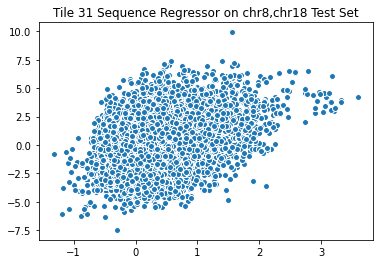

In [25]:
    
    plt.scatter(
        x=predictions_df,
        y=label_df,
        edgecolors='w'
    )
    tile_num = int(tile_num)
    tile_num = tile_num + 1

    plt.title("Tile %s Sequence Regressor on chr8,chr18 Test Set"%(tile_num))
    plt.xlabel("test_predictions \n\n %s \n\n %s"%(caption,rmse))
    plt.ylabel("test_labels")

    plt.savefig("sequence_predictions_tile%s"%tile_num)

    print("Regressor coefficients(ConvModel,gkmSVMModel,DeepFactorizedModel):")
    print(sequence_regressor.coef_)

In [30]:
predictions_df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
region_id,,,,,,,,,,,,,,,,,,,,,
H1hesc_10_11_chr8_41583315,0.488484,0.457035,0.331686,0.496066,0.444022,0.509358,0.610682,0.639572,0.461737,0.417155,...,-0.178030,-0.007609,-0.371140,-0.098719,-0.197187,-0.507283,-0.380313,-0.329154,-0.408386,-0.316875
H1hesc_10_16_chr18_77659435,0.120055,0.225426,0.098682,0.112505,-0.002130,0.254049,0.108584,-0.087011,0.137164,-0.056351,...,0.492490,0.416297,0.477232,0.346916,0.206801,0.505670,0.550680,0.421605,0.461112,0.634601
H1hesc_10_19_chr4_2322075,0.738840,0.563385,0.238036,0.099041,0.114797,0.298342,0.098763,0.045769,-0.086242,-0.188285,...,-0.183345,0.073585,-0.308098,-0.115315,-0.529016,-0.220454,-0.009134,-0.286659,0.045777,-0.182604
H1hesc_10_22_chr22_43195695,1.101713,0.998533,1.013038,0.878741,0.955247,1.071040,1.559410,1.248550,1.366645,1.377524,...,0.279994,0.123732,0.147063,0.088577,-0.015405,0.235295,0.043897,0.058340,-0.044959,-0.039631
H1hesc_10_26_chr20_62383215,0.658751,1.195311,0.871239,0.911670,0.764285,0.806200,0.418295,0.853807,1.035870,0.888652,...,0.547207,0.209784,0.361383,0.218364,0.252536,0.255920,0.136890,0.414829,0.213434,0.415879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K562_9_89_chr6_89432935,-0.199434,0.206875,-0.148922,-0.244035,0.067517,-0.083193,-0.035003,0.172424,0.198035,0.109044,...,-0.090060,0.064754,-0.063463,0.097323,-0.099293,-0.082560,-0.180564,-0.147290,-0.161274,-0.313908
K562_9_90_chr6_82854815,-0.127143,-0.068637,-0.154265,-0.419505,-0.208320,-0.286000,-0.088717,-0.462553,0.229422,0.038578,...,0.175045,-0.051713,0.364164,0.163947,0.106442,0.189008,0.115507,0.296834,0.187502,0.584186
K562_9_92_chr8_37786075,-0.165019,-0.118715,-0.229327,-0.173793,-0.101214,-0.213156,-0.103948,-0.073773,-0.371173,-0.122032,...,0.364074,0.455576,0.476059,0.728470,0.353918,0.347675,0.467299,0.400138,0.460795,0.451049


In [6]:
sharpr_df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
region_id,,,,,,,,,,,,,,,,,,,,,
H1hesc_10_11_chr8_41583315,0.317231,-0.724604,-0.405134,-1.868461,-0.351502,-0.638258,-0.056330,-1.467518,0.617258,-0.688854,...,-1.002011,-1.014751,-0.028310,0.024857,-3.592827,0.093222,-0.344899,-3.836752,-1.729563,-1.188174
H1hesc_10_3_chr8_142524515,-0.564344,-0.640884,-0.226255,0.413440,-0.446437,0.211866,0.352136,-1.290451,-0.723411,-2.089060,...,-0.066797,-0.126259,0.447296,-0.969032,-0.690035,-1.450509,-0.991591,-0.929862,-0.174974,-0.990891
H1hesc_12_102_chr8_123689875,0.881872,-4.554353,-0.077203,0.531718,0.153703,3.409988,0.371308,-0.190728,1.113589,0.085535,...,0.049121,-0.479200,-0.525471,-0.585907,0.644608,0.247443,-4.666827,-1.514824,0.088997,0.655101
H1hesc_12_107_chr8_23331975,0.623392,0.070138,-0.716868,0.548186,-2.152254,0.655101,-4.836752,0.190075,-0.355733,-0.480961,...,0.384140,0.169674,1.240063,-0.274510,-0.451814,-3.737217,-1.444435,-0.007864,0.278031,-2.666827
H1hesc_12_108_chr8_27445875,0.175108,0.375484,0.301464,1.198631,-2.666827,-2.804331,-4.045339,-0.088801,0.308977,0.691080,...,-1.243020,-2.403793,0.044783,1.187975,-2.344899,-0.929862,-0.245819,-0.022971,-0.152254,0.446859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K562_9_395_chr18_48395095,-0.804331,0.655101,0.655101,0.655101,-1.344899,-0.344899,0.655101,1.271772,2.339599,2.053650,...,-0.929862,0.655101,2.462456,2.355541,1.534807,1.837041,1.777091,1.710693,1.293305,1.743211
K562_9_66_chr18_68095895,-0.344899,-1.804331,0.655101,-0.344899,2.044143,-0.110434,-1.344899,0.655101,1.770578,2.977029,...,-1.789684,-0.344899,-1.514824,-0.344899,-3.592827,0.655101,0.655101,-3.804331,-0.344899,-0.698536
K562_9_67_chr18_2222715,0.339599,-2.567292,-1.192896,-2.836752,1.355541,0.655101,-3.929862,0.655101,-0.576846,-3.134976,...,0.314872,0.980501,0.422124,-0.929862,0.752398,0.076741,0.825026,-2.152254,1.655101,1.877493


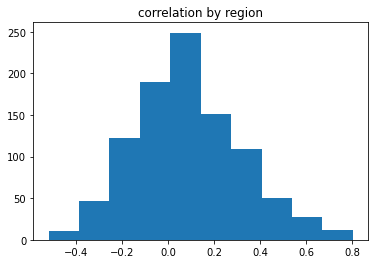

In [11]:
correlation_region = predictions_df.corrwith(sharpr_df,axis=1)
plt.hist(correlation_region)
# plt.xlabel('region')
# plt.ylabel('correlation')
plt.title('correlation by region')
plt.show()


In [ ]:
correlation_region = predictions_df.corrwith(sharpr_df,axis=1)
plt.plot(range(0,967,1), correlation_region)
plt.xlabel('region')
plt.ylabel('correlation')
plt.title('correlation by region')
plt.show()

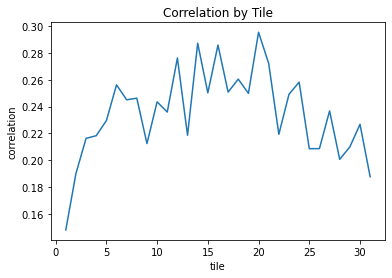

In [31]:
tiles = list(range(1, 32))
plt.plot(
    tiles,
    corr
)

plt.title("Correlation by Tile")
plt.xlabel("tile")
plt.ylabel("correlation")

plt.show()

In [10]:
sharpr_df.to_csv('/u/home/m/mardren/scratch/SHARPR/sequence_labels_chr8_18.tsv',sep='\t',header=False)

In [10]:
predictions_df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
H1hesc_10_11_chr8_41583315,0.825762,0.676398,0.366351,0.569345,0.543391,0.625022,0.671678,0.518756,0.555406,0.435847,...,0.043123,0.330651,0.053096,0.116585,-0.083479,-0.327737,-0.230786,-0.063607,-0.161683,-0.140874
H1hesc_10_3_chr8_142524515,0.172216,0.233529,0.147585,0.257526,0.479321,0.107619,0.041437,0.129319,0.262540,0.248206,...,-0.068425,0.143220,0.199149,0.092578,0.173023,0.456055,0.163961,0.385543,0.373227,0.225392
H1hesc_12_102_chr8_123689875,0.833574,0.756482,0.633484,0.837326,0.620843,0.817160,0.756677,0.979405,0.416260,0.361060,...,0.184293,0.161264,0.204844,0.096265,0.110690,0.088098,0.146219,0.146123,0.184396,0.003023
H1hesc_12_107_chr8_23331975,1.941077,2.436665,1.720929,1.727998,1.247838,1.128887,1.666911,1.400664,1.231573,0.951927,...,1.041660,0.909088,0.953486,0.587444,0.401017,0.470972,0.009781,0.364080,0.226117,0.200619
H1hesc_12_108_chr8_27445875,-0.028801,-0.009302,-0.038019,-0.202239,-0.112993,-0.068584,-0.096096,0.018644,1.018459,0.596844,...,0.018771,0.020601,0.016750,-0.078151,0.085820,0.087297,0.060390,0.145234,0.216349,0.395734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K562_9_395_chr18_48395095,-0.105787,0.006124,-0.004948,-0.180488,-0.047527,-0.188049,-0.116717,-0.187505,-0.119934,0.007065,...,0.660661,0.775745,0.559510,0.288971,0.504092,0.314488,0.282692,0.682570,0.230685,0.290021
K562_9_66_chr18_68095895,-0.059589,0.163278,0.000336,-0.026473,0.012710,0.094743,0.098540,0.088674,0.055961,0.124988,...,0.104309,0.233776,0.153455,0.189629,0.312489,0.063767,0.238536,0.312971,0.149718,0.487651
K562_9_67_chr18_2222715,-0.038304,0.110083,0.189557,-0.122358,0.084477,0.008805,0.003685,0.081143,0.160220,0.051501,...,0.057824,0.203324,0.172644,0.227966,0.085782,0.032991,0.081371,0.067155,0.048995,0.118349


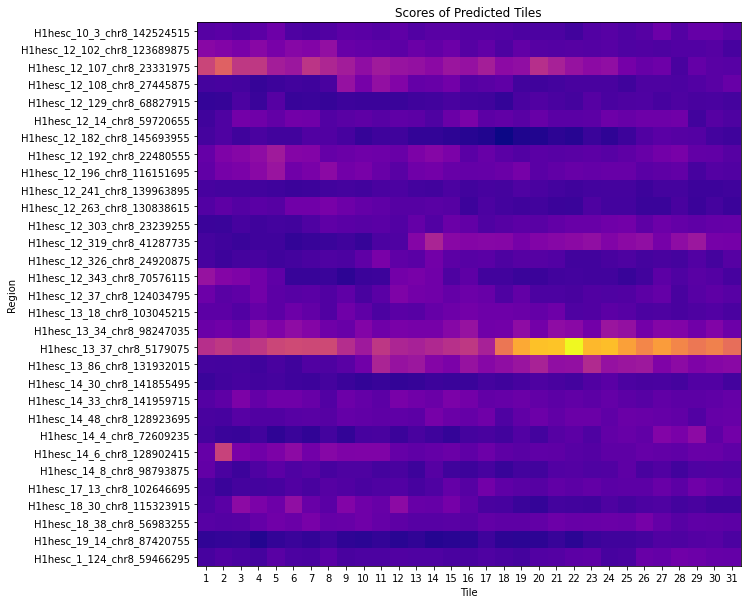

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#generate heatmap
start = 1
matrix = predictions_df[start:start+31:1]
# matrix = matrix.sort_values(by = [15])
plt.figure(figsize = (10,10))
plt.imshow(matrix)
plt.title("Scores of Predicted Tiles")
plt.xlabel("Tile")
plt.xticks(np.arange(31),matrix.columns)
plt.ylabel("Region")
plt.yticks(np.arange(31),matrix.index)
plt.imshow(matrix,cmap='plasma')

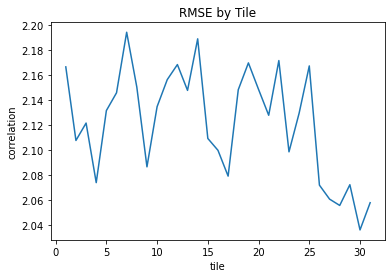

In [48]:
tiles = list(range(1, 32))
plt.plot(
    tiles,
    corr
)

plt.title("RMSE by Tile")
plt.xlabel("tile")
plt.ylabel("correlation")

plt.show("sequence_predictions_tile")

In [3]:
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import sklearn.linear_model
    from sklearn.linear_model import LinearRegression
    import joblib
    import sys
    
    tile_num = '15'
    Data_path = "/u/home/m/mardren/scratch/SequenceML"
    gkm_path = "%s/features.gkSVM.HepG2.tsv.gz"%Data_path
    conv_path       = "%s/features.dragoNN_ConvModel.HepG2.SV40P.Rep1.tsv.gz"%Data_path
    deepfact_path       = "%s/features.dragoNN_DeepFactorizedModel.HepG2.minP.Rep1.tsv.gz"%Data_path
    kmer_path = "%s/6mer_prediction_chr1-14.pkl"%Data_path
    sharpr_path = "%s/6mer_sharpr_score_chr1-14.pkl"%Data_path


    #open data from csv into dataframes
    gkm = pd.read_csv(gkm_path, header = 0, index_col = 0, sep = '\t')
    conv  = pd.read_csv(conv_path, header = 0, index_col = 0, sep = '\t')
    deepfact = pd.read_csv(deepfact_path, header = 0, index_col = 0, sep = '\t')
    kmer = pd.read_pickle('%s'%(kmer_path))
    #subset by selected tile
    sharpr = pd.read_pickle('%s'%(sharpr_path))
    gkm_15 = gkm[['feat_gksvm_%s'%tile_num]]
    gkm_15 = gkm_15.rename(columns = {'feat_gksvm_%s'%tile_num:'gkm_%s'%tile_num})
    conv_15 = conv[[tile_num]]
    conv_15 = conv_15.rename(columns = {tile_num:'conv_%s'%tile_num})
    deepfact_15 = deepfact[[tile_num]]
    deepfact_15 = deepfact_15.rename(columns = {tile_num:'deepfact_%s'%tile_num})
    tile_num = int(tile_num)
    kmer_15 = kmer[[tile_num]]
    kmer_15 = kmer_15.rename(columns = {tile_num:'kmer_%s'%tile_num})
    sharpr_15 = sharpr[[tile_num]]
    sharpr_15 = sharpr_15.rename(columns = {tile_num:'sharpr_%s'%tile_num})

    #create data dataframe
    #data = pd.concat([conv_15, gkm_15, deepfact_15, kmer_15, sharpr_15], axis=1)
    data = pd.concat([conv_15, gkm_15, deepfact_15, sharpr_15], axis=1)
#     #check correlation
#     sharpr_15_array = np.asarray(sharpr_15)
#     sharpr_15_array = sharpr_15_array.flatten()
#     conv_15_array = np.asarray(conv_15)
#     conv_15_array = conv_15_array.flatten()
#     deepfact_15_array = np.asarray(deepfact_15)
#     deepfact_15_array = deepfact_15_array.flatten()
#     kmer_15_array = np.asarray(kmer_15)
#     kmer_15_array = kmer_15_array.flatten()
#     gkm_15_array = np.asarray(gkm_15)
#     gkm_15_array = gkm_15_array.flatten()
#     print('corr of SHARPR score and dragoNN ConvModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(conv_15_array)))
#     print('corr of SHARPR score and gkmSVMModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(gkm_15_array)))
#     print('corr of SHARPR score and dragoNN DeepFactorizedModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(deepfact_15_array)))
#     print('corr of SHARPR score and 6merModel:')
#     print(pd.Series(sharpr_15_array).corr(pd.Series(kmer_15_array)))
    

    #reset index to be able to access region_id
    data = data.reset_index()

    #split region_id to create chrom column
    data['chrom'] = data['region_id'].str.split('_').str[3]

    #setting aside chr1 and chr2 for testing data
    training_data_chr1 = data[data["chrom"] == 'chr1']
    training_data_chr2 = data[data["chrom"] == 'chr2']
    training_data_chr3 = data[data["chrom"] == 'chr3']
    training_data_chr4 = data[data["chrom"] == 'chr4']
    training_data_chr5 = data[data["chrom"] == 'chr5']
    training_data_chr6 = data[data["chrom"] == 'chr6']
    training_data_chr7 = data[data["chrom"] == 'chr7']
    training_data_chr8 = data[data["chrom"] == 'chr8']
    training_data_chr9 = data[data["chrom"] == 'chr9']
    training_data_chr10 = data[data["chrom"] == 'chr10']
    training_data_chr11 = data[data["chrom"] == 'chr11']
    training_data_chr12 = data[data["chrom"] == 'chr12']
    training_data_chr13 = data[data["chrom"] == 'chr13']
    training_data_chr14 = data[data["chrom"] == 'chr14']
    frames = [training_data_chr1, training_data_chr2,training_data_chr3,training_data_chr4,training_data_chr5,training_data_chr6,training_data_chr7,training_data_chr8,training_data_chr9,training_data_chr10,training_data_chr11,training_data_chr12,training_data_chr13,training_data_chr14]
    train_set = pd.concat(frames)

    testing_data_nochr1 = data[data["chrom"] != 'chr1']
    test_set = testing_data_nochr1[testing_data_nochr1["chrom"] != 'chr2']
    test_set = test_set[test_set["chrom"] != 'chr3']
    test_set = test_set[test_set["chrom"] != 'chr4']
    test_set = test_set[test_set["chrom"] != 'chr5']
    test_set = test_set[test_set["chrom"] != 'chr6']
    test_set = test_set[test_set["chrom"] != 'chr7']
    test_set = test_set[test_set["chrom"] != 'chr8']
    test_set = test_set[test_set["chrom"] != 'chr9']
    test_set = test_set[test_set["chrom"] != 'chr10']
    test_set = test_set[test_set["chrom"] != 'chr11']
    test_set = test_set[test_set["chrom"] != 'chr12']
    test_set = test_set[test_set["chrom"] != 'chr13']
    test_set = test_set[test_set["chrom"] != 'chr14']
    
    test_set = test_set.drop(columns=['chrom'])
    train_set = train_set.drop(columns=['chrom'])
    data = data.drop(columns=['chrom'])

    



In [6]:
data

,region_id,conv_15,gkm_15,deepfact_15,sharpr_15
0,H1hesc_10_0_chr9_108475935,-0.055890,0.132106,0.142312,-0.091613
1,H1hesc_10_10_chr3_13672895,0.149902,0.013145,-0.262623,-0.762057
2,H1hesc_10_11_chr8_41583315,-0.194376,0.050826,0.145076,0.126722
3,H1hesc_10_12_chr3_183889475,0.081191,0.064345,0.338965,0.427690
4,H1hesc_10_13_chr3_138502495,-0.368951,0.045163,0.235830,-3.432362
...,...,...,...,...,...
15715,K562_9_96_chr6_152416495,0.644106,0.141500,0.908556,1.584712
15716,K562_9_97_chr3_170719195,-0.113810,0.275966,-0.105357,0.655101
15717,K562_9_98_chr1_196018775,-0.123301,-0.033204,0.203964,-2.514824
15718,K562_9_99_chr1_15433275,-0.000221,0.105710,-0.275707,0.482461


In [139]:
labels = train_set['sharpr_%s'%tile_num].values

In [140]:
train_set = train_set.drop(columns=['region_id','sharpr_%s'%tile_num])
encodings = train_set.values.tolist()
encodings = np.asarray(encodings)
encodings_df = pd.DataFrame(encodings)
encodings_df.fillna(encodings_df.mean(), inplace=True)
encodings = encodings_df.to_numpy()
labels = np.reshape(labels,(15537,))

In [141]:

#test_set.to_pickle('%s/%s_test_set.pkl'%(Data_path, tile_num)

#format the training data
#labels = train_set['sharpr_15'].values
# train_set = train_set.drop(columns=['region_id','sharpr_15'])
# encodings = train_set.values.tolist()
# encodings = np.asarray(encodings)
# encodings_df = pd.DataFrame(encodings)
# encodings_df.fillna(encodings_df.mean(), inplace=True)
# encodings = encodings_df.to_numpy()
# labels = np.reshape(labels,(12888,))


#format the testing data
test_labels = test_set['sharpr_%s'%tile_num].values
test_set = test_set.drop(columns=['region_id','sharpr_%s'%tile_num])
test_encodings = test_set.values.tolist()
test_encodings = np.asarray(test_encodings)
test_encodings_df = pd.DataFrame(test_encodings)
test_encodings_df.fillna(test_encodings_df.mean(), inplace=True)
test_encodings = test_encodings_df.to_numpy()
test_labels = np.reshape(test_labels,(183,))


In [142]:
#train a linear regressor on the training dataset. 
from sklearn.linear_model import LinearRegression

sequence_regressor = LinearRegression()
sequence_regressor.fit(encodings, labels)

LinearRegression()

In [143]:
encodings

array([[-0.17318532,  0.07174177, -0.3193351 ,  0.46704546],
       [ 0.0108388 ,  0.029652  , -0.18368907, -0.35987881],
       [ 0.03997922,  0.06603316,  0.3280099 , -0.39431267],
       ...,
       [-0.21446411,  0.03362841,  0.18228859, -0.21206448],
       [ 0.5510333 ,  0.0782281 , -0.04327216,  0.24012516],
       [-0.28694302, -0.05472399, -0.01872583, -0.4236812 ]])

In [144]:
test_encodings

array([[-3.25992850e-02,  2.43041511e-01, -1.78222940e-01,
         4.20126321e-01],
       [-3.40620240e-03,  1.50938637e-01,  5.77616100e-02,
         3.84609314e-01],
       [-1.25070530e-01,  1.65631444e-01, -2.88532440e-01,
         5.42106896e-01],
       [ 6.09082730e-02,  2.24396704e-01,  2.75995700e-01,
         4.70891413e-01],
       [ 2.76386470e-01,  2.25293096e-01,  4.12858000e-01,
         8.70475180e-01],
       [ 9.75544100e-02,  1.16869393e-01,  7.99786600e-02,
         7.52784446e-01],
       [ 4.99038100e-02,  1.49640548e-01,  4.56504020e-01,
         1.73598552e-02],
       [-2.03374800e-01,  4.90187068e-02,  4.03085500e-01,
         2.74428156e-01],
       [ 5.40770800e-02,  2.10104542e-01,  2.91245460e-01,
         2.79540534e-01],
       [-2.00430120e-01,  9.84662222e-03, -2.47583940e-01,
         2.79645372e-01],
       [ 1.76685240e-01,  2.27254674e-01,  4.15353450e-01,
         7.99607205e-01],
       [ 8.49940700e-02,  1.63724452e-01, -5.38591800e-02,
      

In [145]:
test_encodings

array([[-3.25992850e-02,  2.43041511e-01, -1.78222940e-01,
         4.20126321e-01],
       [-3.40620240e-03,  1.50938637e-01,  5.77616100e-02,
         3.84609314e-01],
       [-1.25070530e-01,  1.65631444e-01, -2.88532440e-01,
         5.42106896e-01],
       [ 6.09082730e-02,  2.24396704e-01,  2.75995700e-01,
         4.70891413e-01],
       [ 2.76386470e-01,  2.25293096e-01,  4.12858000e-01,
         8.70475180e-01],
       [ 9.75544100e-02,  1.16869393e-01,  7.99786600e-02,
         7.52784446e-01],
       [ 4.99038100e-02,  1.49640548e-01,  4.56504020e-01,
         1.73598552e-02],
       [-2.03374800e-01,  4.90187068e-02,  4.03085500e-01,
         2.74428156e-01],
       [ 5.40770800e-02,  2.10104542e-01,  2.91245460e-01,
         2.79540534e-01],
       [-2.00430120e-01,  9.84662222e-03, -2.47583940e-01,
         2.79645372e-01],
       [ 1.76685240e-01,  2.27254674e-01,  4.15353450e-01,
         7.99607205e-01],
       [ 8.49940700e-02,  1.63724452e-01, -5.38591800e-02,
      

In [146]:
from sklearn.metrics import mean_squared_error
test_predictions = sequence_regressor.predict(test_encodings)
test_mse = mean_squared_error(test_predictions, test_labels)
test_rmse = np.sqrt(test_mse)

In [147]:
test_rmse

1.5112103194352628

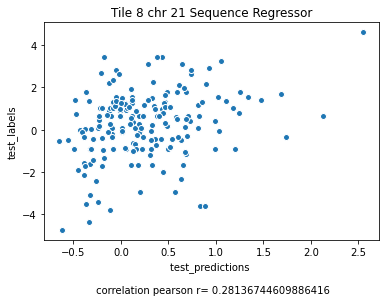

In [148]:
test_encodings=test_encodings.flatten()
test__labels=test_labels.flatten()
#visualize the results
caption = "correlation pearson r= %s"%(pd.Series(test_predictions).corr(pd.Series(test_labels)))


plt.scatter(
    x=test_predictions,
    y=test_labels,
    edgecolors='w'
)
tile_num = int(tile_num)
tile_num = tile_num + 1

plt.title("Tile %s chr 21 Sequence Regressor"%(tile_num))
plt.xlabel("test_predictions \n\n %s"%caption)
plt.ylabel("test_labels")

plt.show()

In [149]:
fn = open("sequence_predictions_tile%s.txt"%tile_num,"w")
np.savetxt(fn,test_predictions)
fn.close()

In [119]:
sequence_regressor.coef_

array([ 1.24793958, -0.26916741,  0.71630956,  0.58157011])